In [1]:
t = var('t')
v = var('c_1', domain='positive')
b = var('c_2', domain='positive')
f = c_1 * exp(-(c_2)*t)
show(f.integral(t, 0, infinity))

c_1/c_2

# Moment generating function - Gaussian

In [2]:
var('mu, sigma')
assume(sigma>0)
assume(mu, 'real')
f(x) = 1/(sigma*sqrt(2*pi)) * exp(-(x-mu)^2/(2*sigma^2))
show(f(x))

1/2*sqrt(2)*e^(-1/2*(mu - x)^2/sigma^2)/(sqrt(pi)*sigma)

In [3]:
# Moment-generating function M(t) = E(e^{Xt})
var('t')
assume(t > 0)
f(x) 
M(t) = simplify(integrate(exp(x*t)*f(x),x,-Infinity,Infinity))
show(M(t))

e^(1/2*sigma^2*t^2 + mu*t)

In [4]:
e_x = integrate(x*f(x),x,-Infinity,Infinity)
show(simplify(e_x))

mu

In [5]:
assume(sigma>0)
assume(mu > 0) # Not sure why we need this
v_x = integrate((x-mu)^2*f(x),x,-oo,oo)
show(simplify(v_x))

sigma^2

In [6]:
# Differentiate four times, set t=0 to get E(X^4)
e_x_2 = derivative(M(t),t,2)(t=0)
show(e_x_2)

mu^2 + sigma^2

In [7]:
# Differentiate four times, set t=0 to get E(X^4)
e_x_4 = derivative(M(t),t,4)(t=0)
show(e_x_4)

mu^4 + 6*mu^2*sigma^2 + 3*sigma^4

In [8]:
var_t = e_x_4 - e_x_2^(2)
show(expand(var_t))

4*mu^2*sigma^2 + 2*sigma^4

In [9]:
variance = 1
gaussian = RealDistribution('gaussian', variance)

In [10]:
gaussian.cum_distribution_function(Infinity)

1.0

# Gaussian distribution

## Setup the PDF of a univariate $X \sim \mathcal{N}(\mu,\sigma^{2})$ distributed random variable

**Credits:**
- This uses [these slides}(http://www.utstat.utoronto.ca/~brunner/workshops/sagemath/SageMathIntro.pdf) from Prof. Jerry Bruner on Sagemath in Statistics

var('mu, sigma')
assume(sigma > 0)
assume(mu, 'real')
f(x) = simplify(1/(sigma*sqrt(2*pi)) * exp(-(x-mu)^2/(2*sigma^2)))
show(f(x))

In [11]:
var('x')
assume(x, 'real')
f(x) = simplify(1/(sqrt(2*pi)) * exp(-(x)^2/(2)))
show(f(x))

1/2*sqrt(2)*e^(-1/2*x^2)/sqrt(pi)

Looks like that is working, though with a rational numerator. But that is fine.

## Setup the CDF of a univariate $X \sim \mathcal{N}(\mu,\sigma^{2})$ distributed random variable

In [12]:
F(x) = integrate(f(t),t,-Infinity,x)
show(F(x))

1/4*sqrt(2)*(sqrt(2)*sqrt(pi)*erf(1/2*sqrt(2)*x) + sqrt(2)*sqrt(pi))/sqrt(pi)

This is in a slightly different form to what we typically use, i.e., just left in terms of the integral definition.

Let's test it out at extreme points $x \in {-\infty, 0, \infty}$.

In [13]:
print(f"F(x) evaluated at x = -Inf: {simplify(F(-Infinity))}")
print(f"F(x) evaluated at x = 0: {simplify(F(0))}")
print(f"F(x) evaluated at x = Inf: {simplify(F(Infinity))}")

F(x) evaluated at x = -Inf: 0
F(x) evaluated at x = 0: 1/2
F(x) evaluated at x = Inf: 1


Looks like that is working as expected. We should really plot this function over it's support $[-\infty, \infty]$.

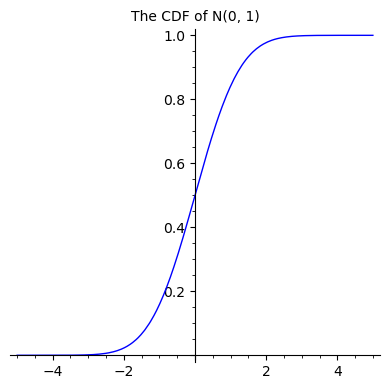

In [14]:
plot(F(x), x, (-5,5),
     figsize=(4,4),
     title="The CDF of N(0, 1)",)

Looks reasonable! Let's keep going!

## Solving an inequality

Let's define our function $g(\nu) := \sqrt{\nu^{2}+\frac{2}{\pi}} - \nu(2 \Phi(\nu)-1) - \sqrt{\frac{2}{\pi}} e^{-\nu^{2} / 2}$

In [15]:
var('v')
assume(v > 0) #TODO: check whether we want to try assume(v, 'real')
g(v) = sqrt(v^(2) + 2/pi) - v * (2 * F(v) - 1) - sqrt(2/pi)*exp(-v^(2)/2)
show(g(v))

-1/2*(sqrt(2)*(sqrt(2)*sqrt(pi)*erf(1/2*sqrt(2)*v) + sqrt(2)*sqrt(pi))/sqrt(pi) - 2)*v - sqrt(2)*e^(-1/2*v^2)/sqrt(pi) + sqrt(v^2 + 2/pi)

In [16]:
g_d_1(v) = derivative(g(v), v, 1)
show(simplify(g_d_1(v)))

-1/2*sqrt(2)*(sqrt(2)*sqrt(pi)*erf(1/2*sqrt(2)*v) + sqrt(2)*sqrt(pi))/sqrt(pi) + v/sqrt(v^2 + 2/pi) + 1

Let's check the largest term, is equivalent to $-2 \Phi(v)$, as per our hand calculations. 
So we can just check that the $g^{\prime}(v) - 1 - \frac{v}{\sqrt{v^2 + \frac{2}{pi}}} = - 2 \Phi(v)$

In [17]:
show(simplify(g_d_1(v) - v/(sqrt(v^(2) + 2/pi)) - 1 + 2 * F(v)))

0

This seems to reconcile the hand calculations, which is a good.
Let's try solving $g^{\prime}(v) = 0$, to get the possible global and local extrema.

In [18]:
solve(simplify(g_d_1(v)) == 0, v)

[v == sqrt((pi*v^2 + 2)/pi)*erf(1/2*sqrt(2)*v)]

This is not so useful, but we can now analyze the solution in more detail.

In particular, lets look at the limiting behaviour of $g^{\prime}(v)$ as $v \to 0^{+}$ and $v \to + \infty$

In [19]:
print(f"One extrema occurs at v = 0, i.e., implify(limit(g_d_1(v), v=0, dir='+')): {simplify(limit(g_d_1(v), v=0, dir='+'))}")
print(f"One extrema occurs at v = Inf, i.e., limit(g_d_1(v), v=Infinity): {limit(g_d_1(v), v=Infinity)}")

One extrema occurs at v = 0, i.e., implify(limit(g_d_1(v), v=0, dir='+')): 0
One extrema occurs at v = Inf, i.e., limit(g_d_1(v), v=Infinity): 0


Indeed, they are both 0, and global extrema.

In [20]:
g_d_2(v) = derivative(g(v), v, 2)
show(simplify(g_d_2(v)))

-sqrt(2)*e^(-1/2*v^2)/sqrt(pi) - v^2/(v^2 + 2/pi)^(3/2) + 1/sqrt(v^2 + 2/pi)

First observe that the function $h(v) = 2\Phi(v) - 1 = 2(\Phi(v) - \Phi(0))$ for each $v \in \mathbf{R}$, is concave, and twice differentiable. 

It is thus bounded by it's first derivative:


\begin{align*}
    h(y) 
    & \leq h(x) + h^{\prime}(x) (y - x) \text{, for all $x, y \in \mathbf{R}$} \\
\implies h(v)
    & \leq h(0) + h^{\prime}(0) (v) \text{, for all $v \in \mathbf{R}$} \\
\iff h(v)
    & = 2(\Phi(v) - \Phi(0)) \\
    & \leq h(0) + h^{\prime}(0) (v) \text{, for all $v \in \mathbf{R}$} \\
    & \leq 2 v \phi(0) \text{, for all $v \in \mathbf{R}$}        
\end{align*}

In [21]:
h(v) = 2 * F(v) - 1
h_d_1 = derivative(h(v), v, Integer(1))
show(simplify(v*h_d_1(0)))

/var/folders/b9/_ttxrgcn6t945cyff01hmfkr0000gn/T/ipykernel_35332/2400101920.py:3: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.
  show(simplify(v*h_d_1(Integer(0))))


sqrt(2)*v/sqrt(pi)